In [2]:
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ModelCheckpoint
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
multi_data = pd.read_csv("multi_data.csv")

In [4]:
multi_data.shape

(116352, 15)

In [5]:
X = multi_data.drop(columns=['label'], axis=1)
Y = multi_data['label']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

In [6]:
X_train_reshaped = np.reshape(X_train.values, (X_train.shape[0], X_train.shape[1], 1))
X_test_reshaped = np.reshape(X_test.values, (X_test.shape[0], X_test.shape[1], 1))

In [7]:
lstm_model = Sequential()
lstm_model.add(LSTM(64, input_shape=(X_train_reshaped.shape[1], 1), return_sequences=True))
lstm_model.add(Dropout(0.2))
lstm_model.add(LSTM(32))
lstm_model.add(Dropout(0.2))
lstm_model.add(Dense(64, activation='relu'))
lstm_model.add(Dense(10, activation='softmax'))  # Assuming 10 classes for multiclass classification

In [8]:
adam_optimizer = Adam(learning_rate=1e-4)
lstm_model.compile(loss='sparse_categorical_crossentropy', optimizer=adam_optimizer, metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('lstm_best_model.h5', monitor='val_loss', save_best_only=True)

lstm_history = lstm_model.fit(
    X_train_reshaped, y_train,
    epochs=50,
    batch_size=64,
    validation_data=(X_test_reshaped, y_test),
    callbacks=[early_stopping, model_checkpoint]
)

Epoch 1/50


1455/1455 [==============================] - ETA: 0s - loss: 0.9705 - accuracy: 0.6784

C:\Users\Abinash\anaconda3\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1455/1455 [==============================] - 67s 38ms/step - loss: 0.9705 - accuracy: 0.6784 - val_loss: 0.5957 - val_accuracy: 0.7987
Epoch 2/50
1455/1455 [==============================] - 50s 34ms/step - loss: 0.5511 - accuracy: 0.8484 - val_loss: 0.4288 - val_accuracy: 0.8873
Epoch 3/50
1455/1455 [==============================] - 42s 29ms/step - loss: 0.4561 - accuracy: 0.8807 - val_loss: 0.4171 - val_accuracy: 0.8873
Epoch 4/50
1455/1455 [==============================] - 45s 31ms/step - loss: 0.4389 - accuracy: 0.8835 - val_loss: 0.4155 - val_accuracy: 0.8873
Epoch 5/50
1455/1455 [==============================] - 47s 32ms/step - loss: 0.4978 - accuracy: 0.8641 - val_loss: 0.6522 - val_accuracy: 0.7986
Epoch 6/50
1455/1455 [==============================] - 45s 31ms/step - loss: 0.6063 - accuracy: 0.8206 - val_loss: 0.6346 - val_accuracy: 0.7985
Epoch 7/50
1455/1455 [==============================] - 47s 32ms/step - loss: 0.5636 - accuracy: 0.8233 - val_loss: 0.3537 - val_accura

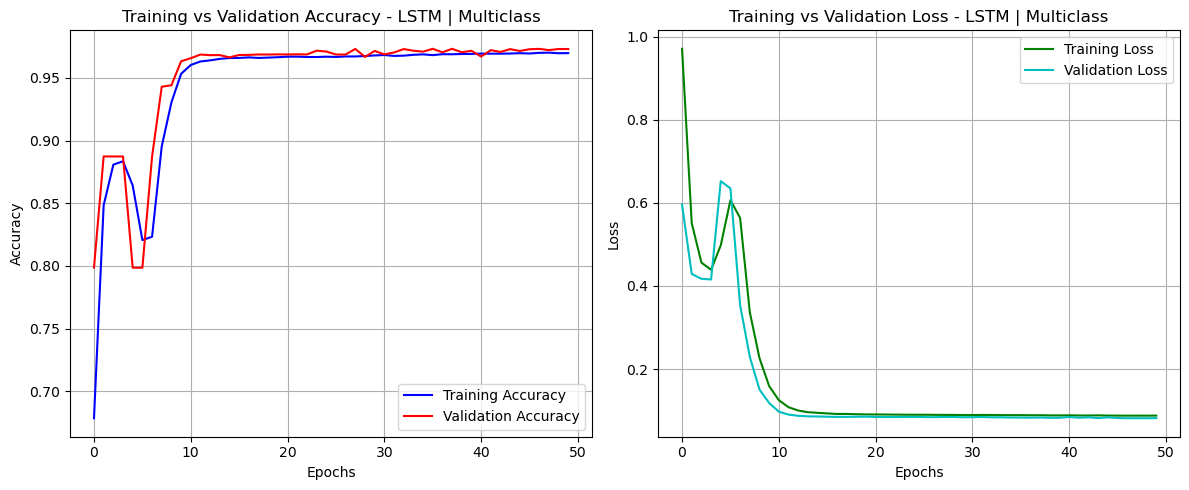

In [10]:
from plot import plot_training_vs_validation
plot_training_vs_validation(lstm_history, "LSTM | Multiclass")

In [11]:
# Evaluate model on test data
test_loss, test_accuracy = lstm_model.evaluate(X_test_reshaped, y_test)

print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")


728/728 [==============================] - 4s 5ms/step - loss: 0.0819 - accuracy: 0.9730
Test Loss: 0.08187909424304962
Test Accuracy: 0.9730136394500732


In [12]:
from sklearn.metrics import confusion_matrix, classification_report

y_test_probabilities = lstm_model.predict(X_test_reshaped)
y_test_pred = np.argmax(y_test_probabilities, axis=1)

conf_matrix = confusion_matrix(y_test, y_test_pred)

728/728 [==============================] - 8s 6ms/step


In [13]:
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[    0     0     0     0    73     0     0    33     0]
 [    0     0     0     0     7     0     0    10     0]
 [    0     0   490     0     0     0     0     0     0]
 [    0     0     0  4313     0     0     0     0     0]
 [    0     0     0     0   240    76     0   119     0]
 [    0     0     0     0    53 11517     0    92     0]
 [    0     0     0     0     0     0  5795     0     0]
 [    0     0     0     0   139     3     0   288     0]
 [    0     0     0     0    12     0     0    11     0]]


In [14]:
print("\nClassification Report:")
print(classification_report(y_test, y_test_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       106
           1       0.00      0.00      0.00        17
           2       1.00      1.00      1.00       490
           3       1.00      1.00      1.00      4313
           4       0.46      0.55      0.50       435
           5       0.99      0.99      0.99     11662
           6       1.00      1.00      1.00      5795
           7       0.52      0.67      0.59       430
           8       0.00      0.00      0.00        23

    accuracy                           0.97     23271
   macro avg       0.55      0.58      0.56     23271
weighted avg       0.97      0.97      0.97     23271



C:\Users\Abinash\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Abinash\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Abinash\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
